In [1]:
# Code formatting
import jupyter_black
jupyter_black.load()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import MultipleLocator

In [4]:
# import os
# os.listdir("Dataset")
# uber_2024 = pd.read_csv("Dataset/ncr_ride_bookings.csv")

In [5]:
# Install dependencies as needed:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ncr_ride_bookings.csv"

# Load the latest version
uber_2024 = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "yashdevladdha/uber-ride-analytics-dashboard",
    file_path,
    # Provide any additional arguments like
    # sql_query or pandas_kwargs. See the
    # documenation for more information:
    # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

In [6]:
## Data Cleaning
# 1. Check data types
# 2. Check for duplicate values
# 3. Check for missing values

In [7]:
# Check data types

In [8]:
type(uber_2024)

pandas.core.frame.DataFrame

In [9]:
# Check for duplicate values

In [10]:
uber_2024.duplicated().sum()

np.int64(0)

In [11]:
uber_2024.drop_duplicates(inplace=True)

In [12]:
uber_2024.duplicated().sum()

np.int64(0)

In [13]:
# Check for missing values

In [14]:
uber_2024.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [15]:
uber_2024.shape

(150000, 21)

In [16]:
uber_2024.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [17]:
uber_2024.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [18]:
## Data Visualization

# 1. Which month has the maximum number of Uber pickups in New York City?

In [19]:
# Ensure Date column is datetime
uber_2024["formattedDate"] = pd.to_datetime(uber_2024["Date"])

In [20]:
# Extract month
uber_2024["month"] = uber_2024["formattedDate"].dt.month_name()

In [21]:
# Define month order
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [22]:
# Set categorical order
uber_2024["month"] = pd.Categorical(
    uber_2024["month"], categories=month_order, ordered=True
)

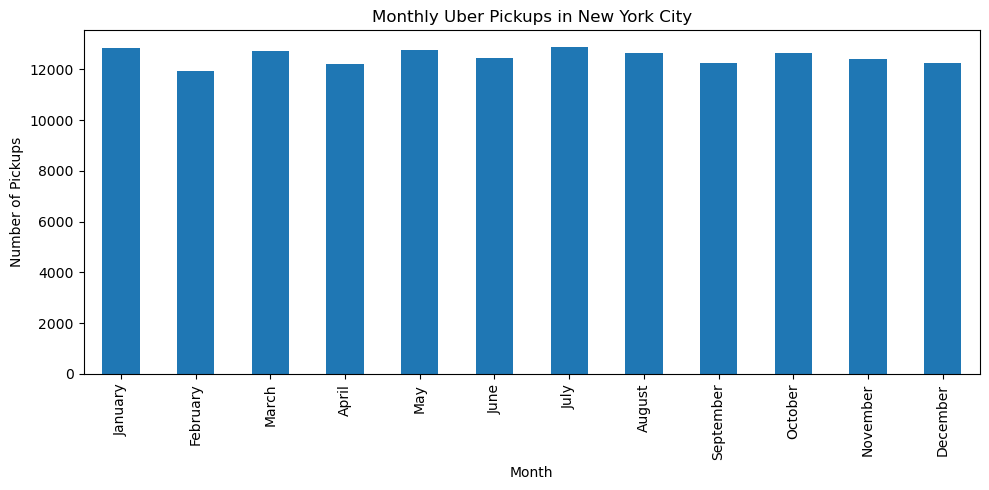

In [23]:
# Count pickups per month
monthly_pickups = (
    uber_2024["month"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))
)
plt.ylabel("Number of Pickups")
plt.xlabel("Month")
plt.title("Monthly Uber Pickups in New York City")
plt.tight_layout()
plt.show()

# 2. Find the pickup location with the highest number of incomplete orders

In [24]:
uber_2024.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'formattedDate',
       'month'],
      dtype='object')

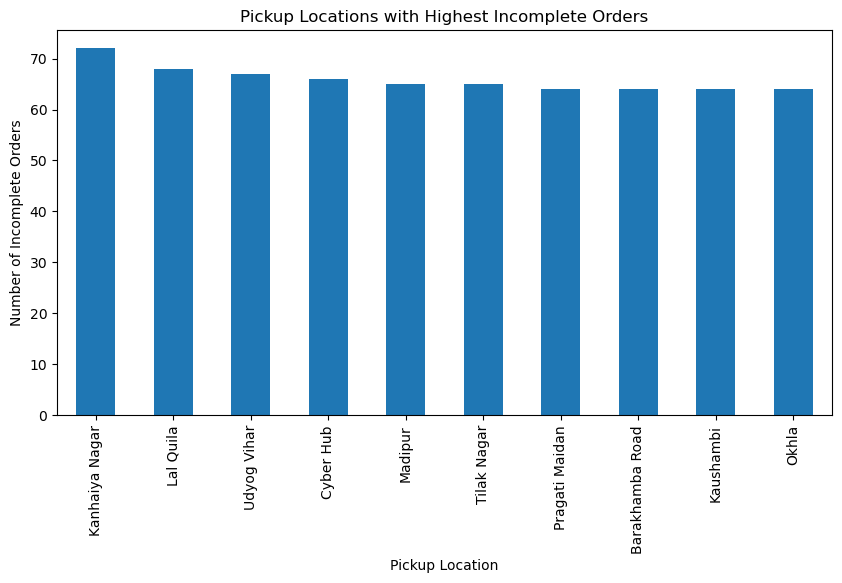

In [25]:
incomplete = uber_2024[uber_2024["Booking Status"] == "Incomplete"]

location_counts = incomplete["Pickup Location"].value_counts().head(10)

location_counts.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Number of Incomplete Orders")
plt.xlabel("Pickup Location")
plt.title("Pickup Locations with Highest Incomplete Orders")
plt.show()

# 3. Find Uber Pickups by Weekday Across Months in New York City

In [26]:
max_val = uber_2024["month"].value_counts().max()

In [27]:
# Ensure Date column is datetime
uber_2024["formattedTime"] = pd.to_datetime(uber_2024["Time"], format="%H:%M:%S")

In [28]:
uber_2024["weekday"] = uber_2024["formattedDate"].dt.day_name()
uber_2024["day"] = uber_2024["formattedDate"].dt.day
uber_2024["hour"] = uber_2024["formattedTime"].dt.hour
uber_2024["minute"] = uber_2024["formattedTime"].dt.minute

In [29]:
pivot = pd.crosstab(index=uber_2024["month"], columns=uber_2024["weekday"])
pivot.style.set_caption("Uber Pickups by Weekday Across Months in New York City")

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
January,1685,1991,1657,1729,1675,2062,2062
February,1677,1685,1614,1666,2059,1669,1557
March,2011,1655,2106,2077,1608,1644,1618
April,1639,2097,1592,1631,1592,2020,1628
May,2065,1673,1658,1625,2021,1649,2087
June,1651,1661,2134,2053,1611,1674,1656
July,1700,2055,1639,1648,1675,2071,2109
August,2022,1547,2070,1629,2007,1650,1711
September,1636,2009,1659,1957,1695,1610,1682


<Axes: xlabel='month'>

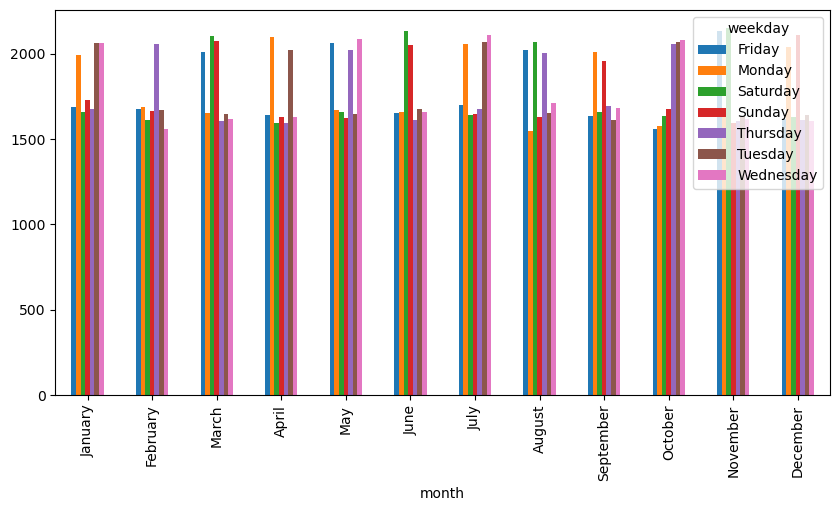

In [30]:
pivot.plot(kind="bar", figsize=(10, 5))

# 4. Find the hourly rush in New York City across all days

In [31]:
summary = uber_2024.groupby(["weekday", "hour"], as_index=False).size()

In [32]:
summary.head(10)

,weekday,hour,size
0,Friday,0,180
1,Friday,1,187
2,Friday,2,190
3,Friday,3,203
4,Friday,4,204
5,Friday,5,379
6,Friday,6,585
7,Friday,7,766
8,Friday,8,984
9,Friday,9,1168


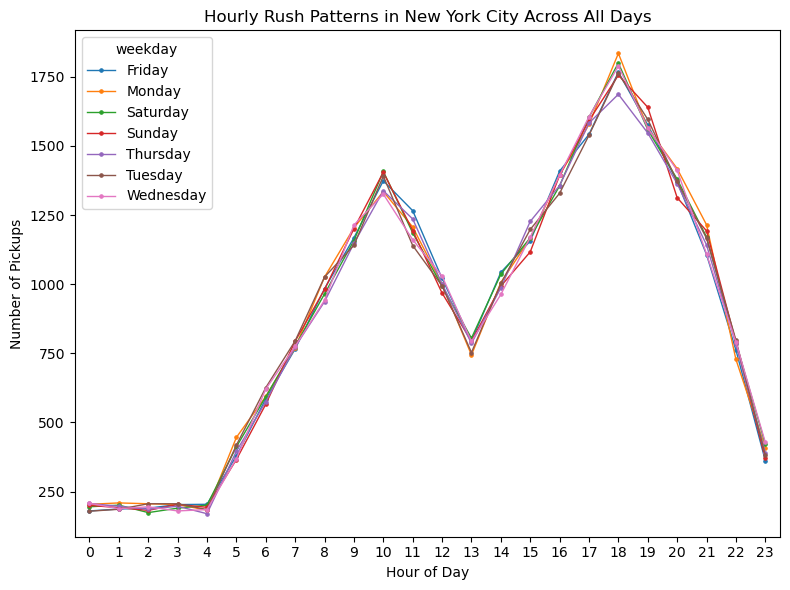

In [33]:
plt.figure(figsize=(8, 6))
sns.pointplot(x="hour", y="size", hue="weekday", data=summary, linewidth=1)

plt.title("Hourly Rush Patterns in New York City Across All Days")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()

# 5. Find the main reason for cancellation by customers

In [34]:
uber_2024.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Ratings,Customer Rating,Payment Method,formattedDate,month,formattedTime,weekday,day,hour,minute
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,2024-03-23,March,1900-01-01 12:29:38,Saturday,23,12,29
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,UPI,2024-11-29,November,1900-01-01 18:01:39,Friday,29,18,1
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,4.9,4.9,Debit Card,2024-08-23,August,1900-01-01 08:56:10,Friday,23,8,56
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,4.6,5.0,UPI,2024-10-21,October,1900-01-01 17:17:25,Monday,21,17,17
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,4.1,4.3,UPI,2024-09-16,September,1900-01-01 22:08:00,Monday,16,22,8
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,4.1,4.6,UPI,2024-02-06,February,1900-01-01 09:44:56,Tuesday,6,9,44
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,4.0,4.1,UPI,2024-06-17,June,1900-01-01 15:45:58,Monday,17,15,45
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,4.4,4.2,UPI,2024-03-19,March,1900-01-01 17:37:37,Tuesday,19,17,37
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,2024-09-14,September,1900-01-01 12:49:09,Saturday,14,12,49
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,Cash,2024-12-16,December,1900-01-01 19:06:48,Monday,16,19,6


In [35]:
cancel_reason_counts = (
    uber_2024["Reason for cancelling by Customer"].dropna().value_counts()
)

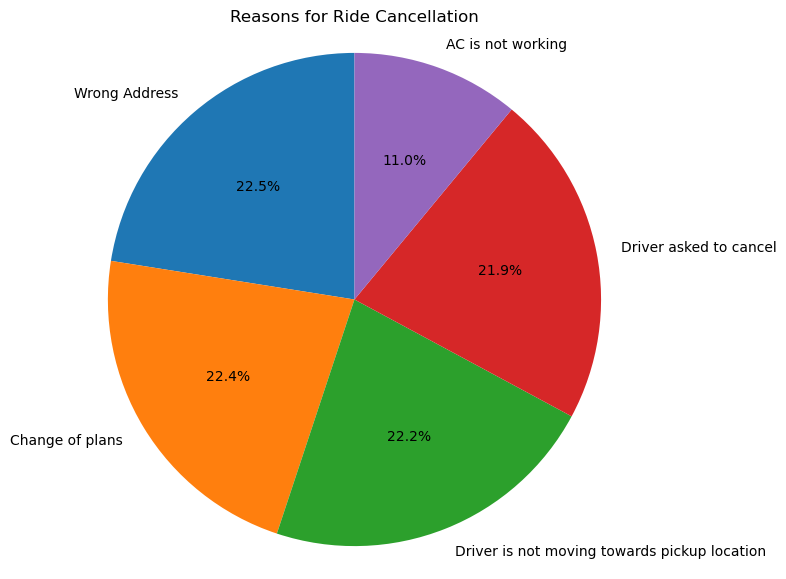

In [36]:
plt.figure(figsize=(7, 7))
plt.pie(
    cancel_reason_counts,
    labels=cancel_reason_counts.index,
    autopct="%1.1f%%",
    startangle=90,
)

plt.title("Reasons for Ride Cancellation")
plt.axis("equal")
plt.show()

# 6. Find the vehicle type with the longest average ride distance

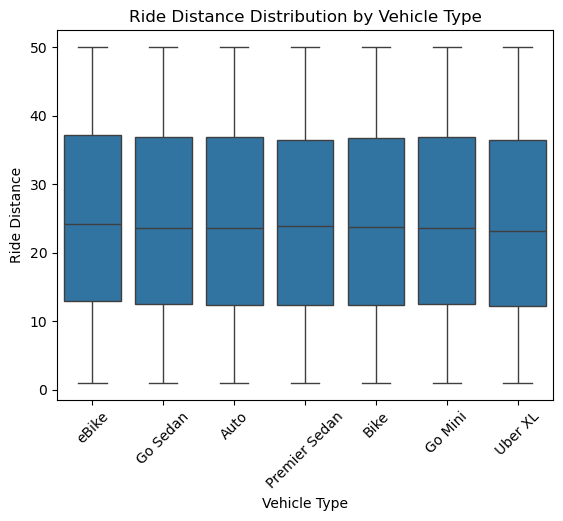

In [37]:
sns.boxplot(x="Vehicle Type", y="Ride Distance", data=uber_2024)
plt.xticks(rotation=45)
plt.title("Ride Distance Distribution by Vehicle Type")
plt.show()

# 7. Find the relationship between ride distance and booking value

In [38]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="Ride Distance", y="Booking Value", data=uber_2024）
plt.title("Ride Distance vs Booking Value")
plt.show()

SyntaxError: invalid character '）' (U+FF09) (946707599.py, line 2)